In [1]:
%load_ext autoreload
%autoreload 2

In [23]:
from utils.data import *
from utils.method import *

In [13]:
from utils.run_main_result import *
run_baseline_uncertainty()

pred_minprobs:	tq_R_k:	0.618	tq_R_unk:	0.862	tq_S_aware:	0.740            	nq_R_k:	0.334	nq_R_unk:	0.914	nq_S_aware:	0.624                	pq_R_k:	0.577	pq_R_unk:	0.893	pq_S_aware:	0.735
pred_fprobs:	tq_R_k:	0.746	tq_R_unk:	0.698	tq_S_aware:	0.722            	nq_R_k:	0.515	nq_R_unk:	0.791	nq_S_aware:	0.653                	pq_R_k:	0.651	pq_R_unk:	0.826	pq_S_aware:	0.739
pred_prodprobs:	tq_R_k:	0.660	tq_R_unk:	0.847	tq_S_aware:	0.753            	nq_R_k:	0.398	nq_R_unk:	0.902	nq_S_aware:	0.650                	pq_R_k:	0.610	pq_R_unk:	0.877	pq_S_aware:	0.744


<Axes: >

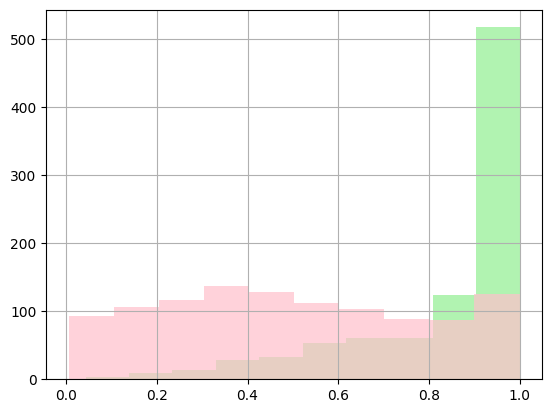

In [19]:
df=pd.read_json('./data/trivia-test_preds.json')
df=cal_know_unknow(df)
df=cal_probs(df)
signal='pred_prodprobs'
df[df['know']==1][signal].hist(color='lightgreen',alpha=0.7)
df[df['know']==0][signal].hist(color='pink',alpha=0.7)

<Axes: >

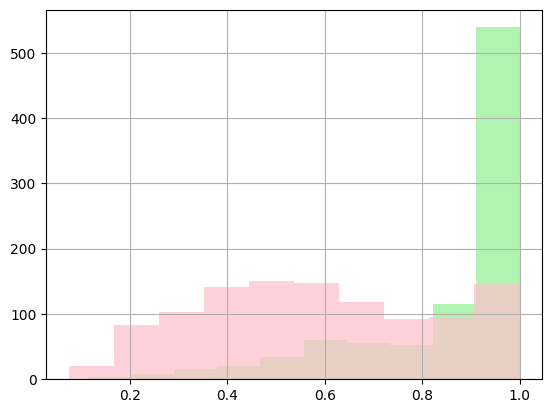

In [20]:
df=pd.read_json('./data/trivia-test_preds.json')
df=cal_know_unknow(df)
df=cal_probs(df)
signal='pred_minprobs'
df[df['know']==1][signal].hist(color='lightgreen',alpha=0.7)
df[df['know']==0][signal].hist(color='pink',alpha=0.7)

In [14]:
import pandas as pd
df=pd.read_json('data/trivia-test_preds_bl.json')
df=get_prompt_pred(df,"pre_pred","No")
get_honest_score(df)

(0.9634551495016611, 0.07474931631722881, 0.519102232909445)

In [15]:
import pandas as pd
df=pd.read_json('data/nq-test_preds_bl.json')
df=get_prompt_pred(df,"pre_pred","No")
get_honest_score(df)

(0.9698795180722891, 0.10251798561151079, 0.5361987518418999)

In [16]:
import pandas as pd
df=pd.read_json('data/pop-test_preds_bl.json')
df=get_prompt_pred(df,"pre_pred","No")
get_honest_score(df)

(0.6535796766743649, 0.3184428844926611, 0.486011280583513)

In [17]:
import pandas as pd
df=pd.read_json('data/trivia-test_preds_bl.json')
df=get_prompt_pred(df,"post_pred","Unsure")
get_honest_score(df)

(0.7054263565891473, 0.5788514129443938, 0.6421388847667706)

In [18]:
import pandas as pd
df=pd.read_json('data/nq-test_preds_bl.json')
df=get_prompt_pred(df,"post_pred","Unsure")
get_honest_score(df)

(0.6265060240963856, 0.5557553956834532, 0.5911307098899194)

In [19]:
import pandas as pd
df=pd.read_json('data/pop-test_preds_bl.json')
df=get_prompt_pred(df,"post_pred","Unsure")
get_honest_score(df)

(0.3163972286374134, 0.828334396936822, 0.5723658127871176)

In [20]:
import pandas as pd
df=pd.read_json('data/trivia-test_preds_bl.json')
df=get_prompt_pred(df,"icl_pred","Unknow")
get_honest_score(df)

(0.8637873754152824, 0.25797629899726526, 0.5608818372062738)

In [21]:
import pandas as pd
df=pd.read_json('data/nq-test_preds_bl.json')
df=get_prompt_pred(df,"icl_pred","Unknow")
get_honest_score(df)

(0.536144578313253, 0.6510791366906474, 0.5936118575019502)

In [22]:
import pandas as pd
df=pd.read_json('data/pop-test_preds_bl.json')
df=get_prompt_pred(df,"icl_pred","Unknow")
get_honest_score(df)

(0.4226327944572748, 0.8538608806636886, 0.6382468375604817)

In [28]:
def extract_fields(text):
    lines = text.split('\n')
    guess = ""
    probability = 0.0
    for line in lines:
        if line.startswith('Guess:'):
            guess = line.split('Guess:')[1].strip()
        elif line.startswith('Probability:'):
            try:
                probability = float(line.split('Probability:')[1].strip())
            except:
                pass
    return guess, probability

In [29]:
import pandas as pd
df=pd.read_json('data/trivia-test_preds_bl.json')
dft=pd.read_json('data/labeled-data_preds_bl.json')
df['pred_verbprobs']=df['verb_pred'].apply(lambda x:extract_fields(x)[1])
df['pred']=df['verb_pred'].apply(lambda x:extract_fields(x)[0])
dft['pred_verbprobs']=dft['verb_pred'].apply(lambda x:extract_fields(x)[1])
dft['pred']=dft['verb_pred'].apply(lambda x:extract_fields(x)[0])
_,t=get_threshod(dft,'pred_verbprobs')
baseline(df,t,'pred_verbprobs')

(0.14285714285714285, 0.9582623509369677, 0.5505597468970552)

In [30]:
import pandas as pd
df=pd.read_json('data/nq-test_preds_bl.json')
dft=pd.read_json('data/labeled-data_preds_bl.json')
df['pred_verbprobs']=df['verb_pred'].apply(lambda x:extract_fields(x)[1])
df['pred']=df['verb_pred'].apply(lambda x:extract_fields(x)[0])
dft['pred_verbprobs']=dft['verb_pred'].apply(lambda x:extract_fields(x)[1])
dft['pred']=dft['verb_pred'].apply(lambda x:extract_fields(x)[0])
_,t=get_threshod(dft,'pred_verbprobs')
baseline(df,t,'pred_verbprobs')

(0.17549668874172186, 0.9499411071849234, 0.5627188979633226)

In [31]:
import pandas as pd
df=pd.read_json('data/pop-test_preds_bl.json')
dft=pd.read_json('data/labeled-data_preds_bl.json')
df['pred_verbprobs']=df['verb_pred'].apply(lambda x:extract_fields(x)[1])
df['pred']=df['verb_pred'].apply(lambda x:extract_fields(x)[0])
dft['pred_verbprobs']=dft['verb_pred'].apply(lambda x:extract_fields(x)[1])
dft['pred']=dft['verb_pred'].apply(lambda x:extract_fields(x)[0])
_,t=get_threshod(dft,'pred_verbprobs')
baseline(df,t,'pred_verbprobs')

(0.17616580310880828, 0.9727385377942999, 0.5744521704515541)